In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [2]:
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
#stratify=cancer.target 바이너리 데이터 일때, target이 25%(0), 75%(1)의 비율로 유지한채로 라벨데이터를 분할.
X_train,X_test,y_train,y_test  = train_test_split(cancer.data,cancer.target,stratify=cancer.target, random_state=42)

In [4]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [5]:
#정확도 출력
print('훈련세트 데이터 정확도: {:3f}'.format(tree.score(X_train,y_train)))
print('inference data accuracy: {:3f}'.format(tree.score(X_test,y_test)))

훈련세트 데이터 정확도: 1.000000
inference data accuracy: 0.937063


### 가지치기
    - 기대효과 : 가지치기를 해서 훈련세트의 overfitting비율은 낮추고, test data의 accuracy rate는 높이고 싶음

In [6]:
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [7]:
#정확도 출력
print('훈련세트 데이터 정확도: {:3f}'.format(tree.score(X_train,y_train)))
print('inference data accuracy: {:3f}'.format(tree.score(X_test,y_test)))

훈련세트 데이터 정확도: 0.988263
inference data accuracy: 0.951049


### 특성 중요도 

In [9]:
print('특성중요도 \n',tree.feature_importances_)

특성중요도 
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


###  특성중요도 시각화

In [10]:
import matplotlib.pyplot as plt
import numpy as np

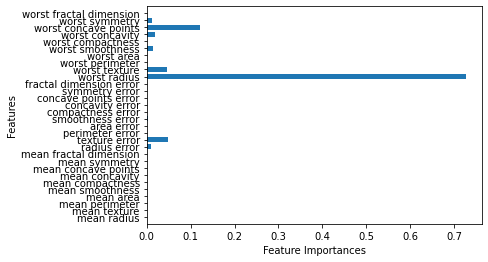

In [16]:
def  plot_feature_importances_cancer(model):
    n_feature = cancer.data.shape[1]
    plt.barh(range(n_feature),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_feature),cancer.feature_names)
    plt.xlabel('Feature Importances')
    plt.ylabel('Features')
    plt.ylim(-1,n_feature)

plot_feature_importances_cancer(tree)

### 결정트리 시각화 

In [17]:
import graphviz
from sklearn.tree import export_graphviz

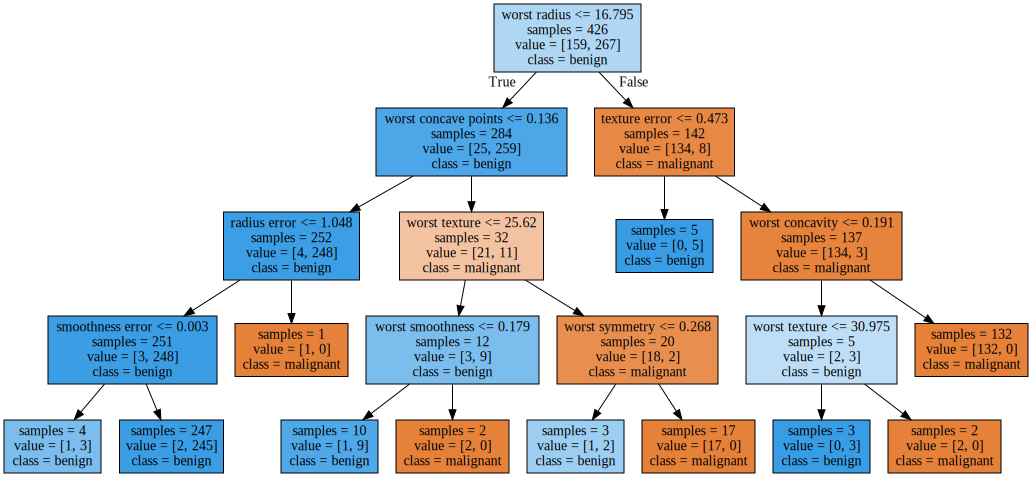

In [18]:
export_graphviz(tree, out_file='cancer_tree.dot',
                class_names=cancer.target_names,
                feature_names=cancer.feature_names,
                impurity=False, # gini 미출력 (gini불순도)
               filled=True)
with open('cancer_tree.dot',encoding='utf-8') as f:
    dot_graph = f.read();
dot = graphviz.Source(dot_graph) #dot_graph의 source저장

display(dot)